# <span style="color:black"> Diabetes Prediction </span>
Please see the corresponding [kaggle](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset) link for the details.

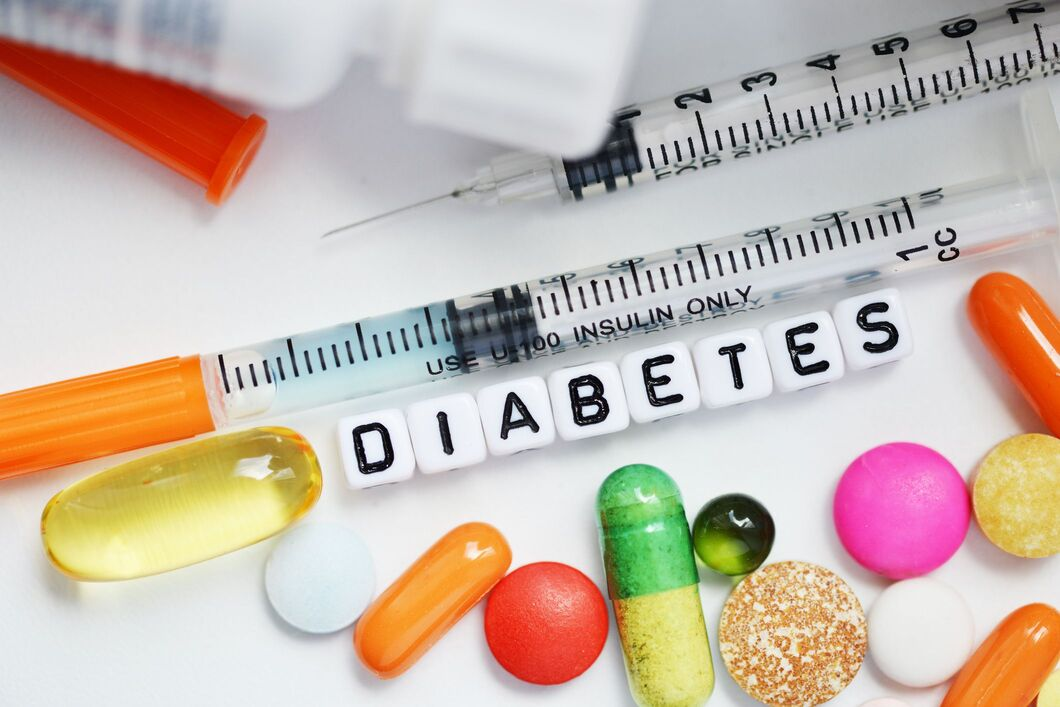

# <span style="color:green"> DATA </span>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 14})
import seaborn as sns

In [5]:
data = pd.read_csv("diabetes_prediction.csv")
data.head(4)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0


# <span style="color:green"> DATA ANALYSIS </span>

In [6]:
print(f"total data shape: {data.shape}")

def unique_features(data):
    nums = []# unique possibilities for each feature
    for feature in data.columns:
        num = len(data.loc[:,feature].unique())
        nums.append(num)
        print(f"feature {feature:20s}: unique values = {num}")
        
unique_features(data)

total data shape: (100000, 9)
feature gender              : unique values = 3
feature age                 : unique values = 102
feature hypertension        : unique values = 2
feature heart_disease       : unique values = 2
feature smoking_history     : unique values = 6
feature bmi                 : unique values = 4247
feature HbA1c_level         : unique values = 18
feature blood_glucose_level : unique values = 18
feature diabetes            : unique values = 2


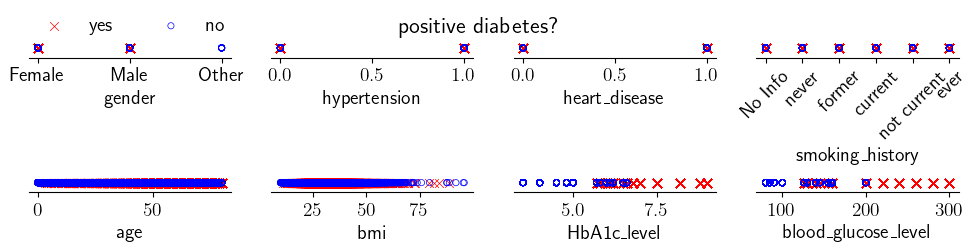

In [7]:
features = ['gender','hypertension','heart_disease','smoking_history',
            'age','bmi','HbA1c_level','blood_glucose_level']

fig, ax = plt.subplots(2, 4, figsize=(12, 2))
fig.subplots_adjust(hspace=6)

ax = ax.flatten()  # Flatten the ax array to access each subplot individually
yes = data.loc[:,'diabetes'] == 1
no = data.loc[:,'diabetes'] == 0
dummy_vec = np.ones(data.shape[0])
for i in range(len(ax)):
    ax[i].scatter(data.loc[yes,features[i]],dummy_vec[yes],marker='x',color='r',s=40,linewidth=0.5,label='yes')
    ax[i].scatter(data.loc[no,features[i]],dummy_vec[no],marker='o',edgecolors='b',facecolors='none',s=20,linewidth=0.5,label='no')
    ax[i].set_xlabel(features[i])
    ax[i].get_yaxis().set_ticks([])
    ax[i].set_ylim(0,2)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    if i == 0:
        ax[i].legend(frameon=False,ncol=2,loc='upper center', bbox_to_anchor=(0, 1, 1, 2))
    if features[i] == 'smoking_history':
        value_counts = data.value_counts('smoking_history')
        xticks = range(len(value_counts))
        xticklabels = value_counts.index.values
        ax[i].set_xticks(xticks)
        ax[i].set_xticklabels(xticklabels,rotation=45)

fig.suptitle('positive diabetes?', fontsize=16)
plt.show()

**Note:** The above figures for categorical features can be quite misleading. Below, we analyze what percentage of the postive cases belong to a specific category (e.g., male or female?)

### **gender**

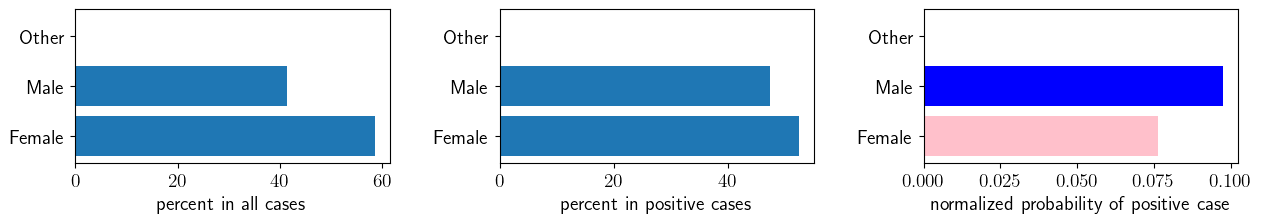

In [9]:
def barplots(feature):
    feature_counts = data.value_counts(feature).sort_index()
    fig, ax = plt.subplots(1, 3, figsize=(15, 2))
    fig.subplots_adjust(wspace=0.35)
    ax = ax.flatten()
    ax[0].barh(feature_counts.index,feature_counts.values/data.shape[0]*100)
    ax[0].set_xlabel('percent in all cases')

    diabetes_by_feature = data.groupby(feature, as_index=True)['diabetes'].sum()
    total_positive_cases = len(data[data['diabetes']==1])
    ax[1].barh(diabetes_by_feature.index,diabetes_by_feature.values/total_positive_cases*100)
    ax[1].set_xlabel('percent in positive cases')

    return diabetes_by_feature, feature_counts, ax, fig

diabetes_by_feature, feature_counts, ax, fig = barplots('gender')
normalized_probability = [diabetes_by_feature['Female']/feature_counts['Female'],
                          diabetes_by_feature['Male']/feature_counts['Male'],
                          diabetes_by_feature['Other']/feature_counts['Other']]
ax[2].barh(['Female','Male','Other'],np.array(normalized_probability),color=['pink', 'blue', 'black'])
ax[2].set_xlabel('normalized probability of positive case')

plt.show()

### **hypertension**

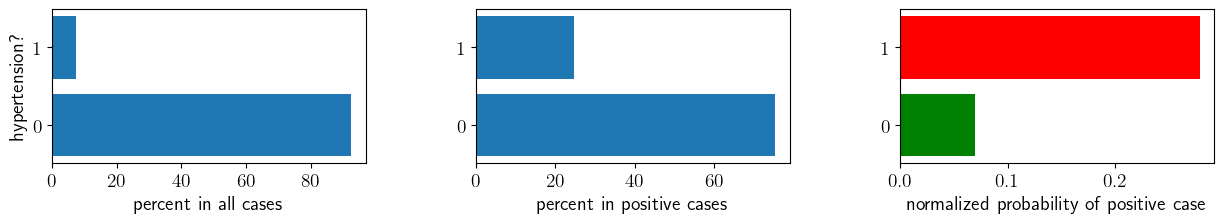

In [10]:
diabetes_by_feature, feature_counts, ax, fig = barplots('hypertension')
normalized_probability = [diabetes_by_feature[0]/feature_counts[0],
                          diabetes_by_feature[1]/feature_counts[1]]
ax[2].barh([0,1],np.array(normalized_probability),color=['green','red'])
ax[2].set_xlabel('normalized probability of positive case')
ax[0].set_ylabel('hypertension?')

plt.show()

### **heart disease**

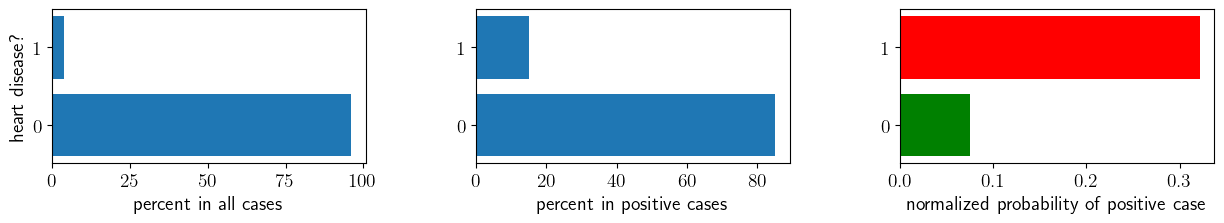

In [12]:
diabetes_by_feature, feature_counts, ax, fig = barplots('heart_disease')
normalized_probability = [diabetes_by_feature[0]/feature_counts[0],
                          diabetes_by_feature[1]/feature_counts[1]]
ax[2].barh([0,1],np.array(normalized_probability),color=['green','red'])
ax[2].set_xlabel('normalized probability of positive case')
ax[0].set_ylabel('heart disease?')

plt.show()

### **smoking**

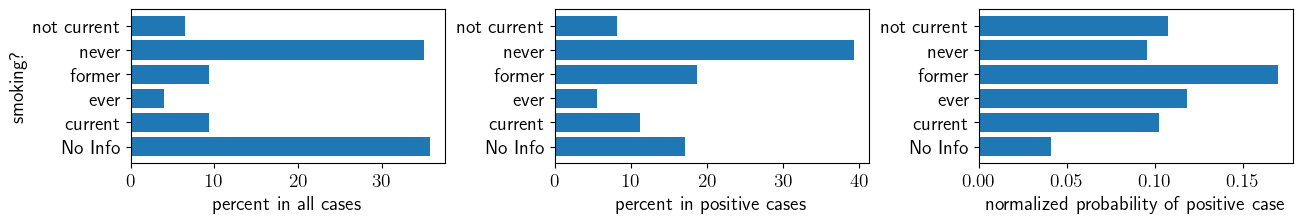

In [13]:
diabetes_by_feature, feature_counts, ax, fig = barplots('smoking_history')

normalized_probability = []
for i in feature_counts.index:
    normalized_probability.append(diabetes_by_feature[i]/feature_counts[i])

ax[2].barh(feature_counts.index,np.array(normalized_probability))
ax[2].set_xlabel('normalized probability of positive case')
ax[0].set_ylabel('smoking?')

plt.show()

### **age**

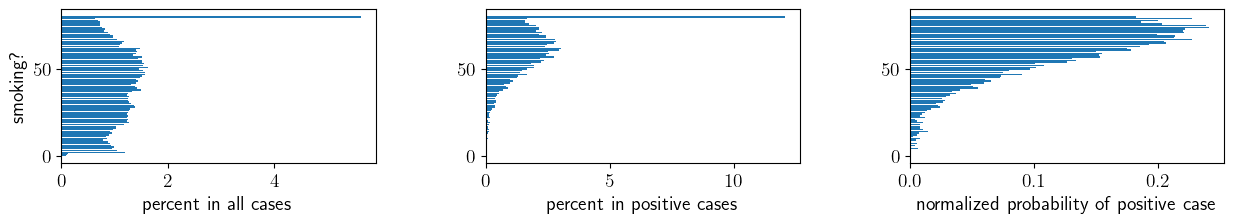

In [14]:
diabetes_by_feature, feature_counts, ax, fig = barplots('age')

normalized_probability = []
for i in feature_counts.index:
    normalized_probability.append(diabetes_by_feature[i]/feature_counts[i])

ax[2].barh(feature_counts.index,np.array(normalized_probability))
ax[2].set_xlabel('normalized probability of positive case')
ax[0].set_ylabel('smoking?')

plt.show()


## Data Analysis Conclusion
It is evident from above analyses that **hypertension**, **heart disease**, **age**, **HbA1c level**, and **blood glucose level** strongly contribute to the probability of a positive diabetes.

## One-hot encoding

In [23]:
cat_features = ['gender','smoking_history']
print(f"The multiclass categorical features are:\n{cat_features}")
dataOHE = pd.get_dummies(data = data, prefix = cat_features, columns = cat_features)

features = [x for x in dataOHE.columns if x != 'diabetes'] ## Removing our target variable
print(f"total number of features after one-hot encoding: {len(features)}")

The multiclass categorical features are:
['gender', 'smoking_history']
total number of features after one-hot encoding: 15


## Correllation

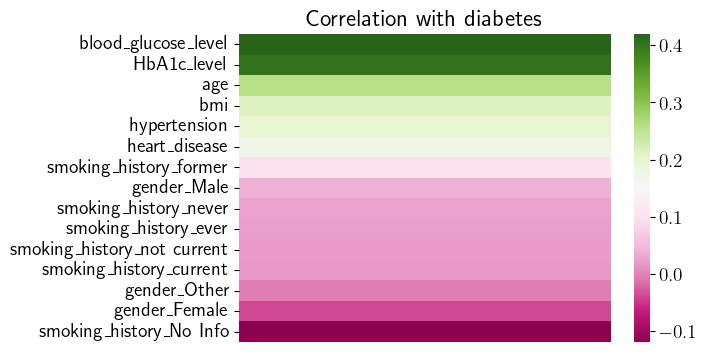

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,1,0,0,0,0
5,20.0,0,0,27.32,6.6,85,0,1,0,0,0,0,0,0,1,0
6,44.0,0,0,19.31,6.5,200,1,1,0,0,0,0,0,0,1,0
7,79.0,0,0,23.86,5.7,85,0,1,0,0,1,0,0,0,0,0
8,42.0,0,0,33.64,4.8,145,0,0,1,0,0,0,0,0,1,0
9,32.0,0,0,27.32,5.0,100,0,1,0,0,0,0,0,0,1,0


In [24]:
corr = dataOHE.corr().loc[:,'diabetes']
corr = corr.sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.heatmap(corr.iloc[1:].to_frame(), cmap="PiYG", xticklabels=False, yticklabels=True)
plt.title('Correlation with diabetes')
plt.show()

dataOHE.head(10)

# <span style="color:green"> MACHINE LEARNING </span>

## Split the data using Scikit-learn

In [25]:
X_train, X_dev, y_train, y_dev = train_test_split(dataOHE[features],dataOHE['diabetes'],train_size=0.8, random_state=1)

X_train = X_train.to_numpy()
X_dev   = X_dev.to_numpy()

y_train = y_train.to_numpy().reshape((-1,1))
y_dev   = y_dev.to_numpy().reshape((-1,1))

print(f"X_train.shape = {X_train.shape}, X_dev.shape = {X_dev.shape}")
print(f"y_train.shape = {y_train.shape}, y_dev.shape = {y_dev.shape}")

X_train.shape = (80000, 15), X_dev.shape = (20000, 15)
y_train.shape = (80000, 1), y_dev.shape = (20000, 1)


## <span style="color:blue"> Neural Network </span>

In [28]:
num_features = len(features)
model_NN = Sequential([
    tf.keras.Input(shape=(num_features,)),
    Dense(units=32, activation='relu'  , name='L1'),
    Dense(units=16, activation='relu'  , name='L2'),
    Dense(units=8 , activation='relu'  , name='L3'),
    Dense(units=1 , activation='linear', name='LO')
])

model_NN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 32)                512       
                                                                 
 L2 (Dense)                  (None, 16)                528       
                                                                 
 L3 (Dense)                  (None, 8)                 136       
                                                                 
 LO (Dense)                  (None, 1)                 9         
                                                                 
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_NN.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))
model_NN.fit(X_train,y_train,epochs=10,verbose=0)

# a function to convert linear output to binary
def prediction(model,X,threshold=0.5):
    z = model.predict(X,verbose=0)
    probs = tf.math.sigmoid(z)
    yhat = np.where(probs >= threshold, 1, 0)
    
    return yhat

trainErr_NN = accuracy_score(prediction(model_NN,X_train),y_train)*100
devErr_NN = accuracy_score(prediction(model_NN,X_dev),y_dev)*100
print(f"Neural Network:\n train accuracy = {trainErr_NN:.4f}%, dev accuracy = {devErr_NN:.4f}%")

Neural Network:
 train accuracy = 91.5012%, dev accuracy = 91.4950%


## <span style="color:blue"> XGBoost </span>

In [30]:
n_estimators = 100
early_stopping_rounds = 20
learning_rate = 0.1
max_depth = 6
lambda_ = 0
model_XGB = XGBClassifier(n_estimators = n_estimators, learning_rate = learning_rate,
                          verbosity = 0, random_state = 1, early_stopping_rounds = early_stopping_rounds,
                          max_depth = max_depth,alpha=lambda_)
model_XGB.fit(X_train,y_train, eval_set = [(X_dev,y_dev)],verbose=False)

print(f"XGBoost:\n train accuracy = {accuracy_score(model_XGB.predict(X_train),y_train)*100:.4f}%, dev accuracy = {accuracy_score(model_XGB.predict(X_dev),y_dev)*100:.4f}%")

XGBoost:
 train accuracy = 97.2738%, dev accuracy = 97.2500%


### Notes
- Both models seem to do a great job, as far as the **accuracy** is concerned. But we will investigate **precision** and **recall** below which may provide better measures for the models.
- The values for $\lambda$ (regularization parameter) and $\mathrm{max\_depth}$ for XGBoost have been chosen to minimize the overfitting. Although, it should be noted that the effect was not significant.

## <span style="color:blue"> Confusion Matrix </span>

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support

def plot_confusion_matrix(y,yhat,method,verbose):
    
#     # Calculate precision and recall
#     N = len(y)
#     true_positives = len(np.where((y==yhat) & (yhat==1))[0])/N   
#     true_negatives = len(np.where((y==yhat) & (yhat==0))[0])/N
#     false_positives = len(np.where((y!=yhat) & (yhat==1))[0])/N
#     false_negatives = len(np.where((y!=yhat) & (yhat==0))[0])/N
    
#     predicted_positives = true_positives+false_positives
#     precision = true_positives/predicted_positives

#     actual_positives = true_positives+false_negatives
#     recall = true_positives/actual_positives
        
    # Use sklearn
    precision, recall, _, _ = precision_recall_fscore_support(y, yhat, average='binary',zero_division=0)
    
    if verbose:
        print(f"precision is {precision*100:.2f}%")
        print(f"recall is {recall*100:.2f}%")

    cm = confusion_matrix(y, yhat, labels=[0, 1],normalize='all')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['$-$', '$+$'])
    disp.plot(colorbar=False)
    plt.title(f"{method}: Confusion matrix for\ncross validation data (20000 cases)")
    plt.show()
    
    return precision, recall

- **Neural Netwrok**

precision is 0.00%
recall is 0.00%


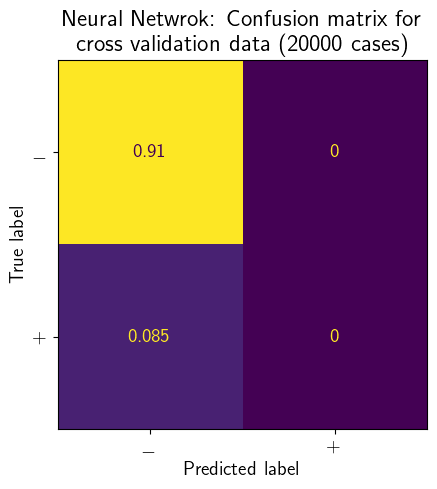

In [32]:
y, yhat = y_dev.reshape(-1,), prediction(model_NN,X_dev).reshape(-1,)
precision, recall = plot_confusion_matrix(y,yhat,'Neural Netwrok',True)

- **XGBoost**

precision is 98.24%
recall is 68.90%


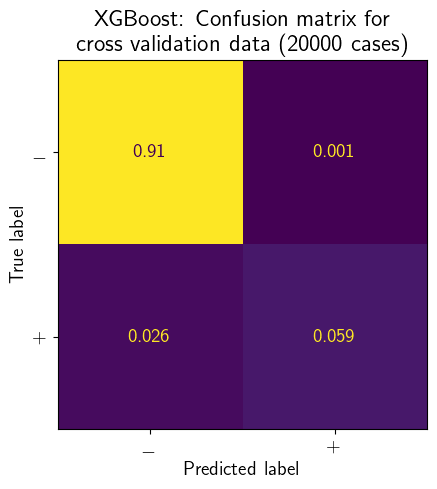

In [33]:
y, yhat = y_dev.reshape(-1,), model_XGB.predict(X_dev)
precision, recall = plot_confusion_matrix(y,yhat,'XGBoost',True)

### Notes:
As we can see, both models need some improvement with the **recall**. In particular, the Neural Network model fails to predict **any** postive cases! Depending on the objectives there are ways such as lowering the binary classification threshold to make the models more sensitive to postivie cases.